<a href="https://colab.research.google.com/github/dgbaenar/deep-learning-with-tensorflow/blob/main/Learning_Tensorflow_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Capítulo 1

In [ ]:
import tensorflow as tf

In [ ]:
x = tf.Variable(0.)

In [ ]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [ ]:
with tf.GradientTape() as tape:
  y = 2 * x + 3

In [ ]:
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))

In [ ]:
with tf.GradientTape() as tape:
  y = 2 * x + 3

In [ ]:
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.13525951, 0.2729926 ],
       [0.2982719 , 0.6956613 ]], dtype=float32)>

In [ ]:
2 * x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.27051902, 0.5459852 ],
       [0.5965438 , 1.3913226 ]], dtype=float32)>

In [ ]:
y

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3.270519 , 3.5459852],
       [3.5965438, 4.3913226]], dtype=float32)>

In [ ]:
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

# 2. Capítulo 2

In [ ]:
input_var = tf.Variable(initial_value=3.) 
with tf.GradientTape() as tape:
  result = tf.square(input_var)
  
gradient = tape.gradient(result, input_var)

In [ ]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

## 2.1 A linear classifier in pure TensorFlow

Intuitively, the covariance matrix describes the shape of the point cloud, and the mean describes its position in the plane (see figure 3.6). We’ll reuse the same covariance matrix for both point clouds, but we’ll use two different mean values—the point clouds will have the same shape, but different positions.

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
num_samples_per_class = 1000 
negative_samples = np.random.multivariate_normal(   
    mean=[0, 3],                                    
    cov=[[1, 0.5],[0.5, 1]],                        
    size=num_samples_per_class)
                    
positive_samples = np.random.multivariate_normal(   
    mean=[3, 0],                                    
    cov=[[1, 0.5],[0.5, 1]],                        
    size=num_samples_per_class)    

In [ ]:
negative_samples

array([[ 0.88546136,  5.58415853],
       [-0.63661736,  3.12826354],
       [ 2.5454125 ,  5.33162237],
       ...,
       [-0.97078362,  1.85520373],
       [-0.14066367,  3.85009665],
       [ 2.58649621,  3.39853112]])

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

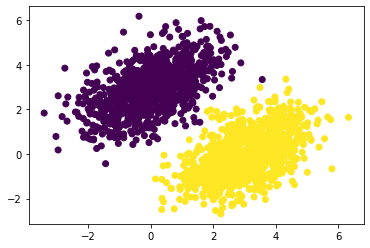

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## 2.2. Creating the linear classifier

In [ ]:
input_dim = 2     
output_dim = 1    
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

### 2.2.1 The forward pass function

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

## 2.3 Backpropagation

In [ ]:
learning_rate = 0.1 
  
def training_step(inputs, targets):
    with tf.GradientTape() as tape:                                  
        predictions = model(inputs)                                  
        loss = square_loss(predictions, targets)                    
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])   
    W.assign_sub(grad_loss_wrt_W * learning_rate)                    
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.7124
Loss at step 1: 0.3492
Loss at step 2: 0.1444
Loss at step 3: 0.1139
Loss at step 4: 0.1037
Loss at step 5: 0.0965
Loss at step 6: 0.0901
Loss at step 7: 0.0843
Loss at step 8: 0.0790
Loss at step 9: 0.0741
Loss at step 10: 0.0698
Loss at step 11: 0.0658
Loss at step 12: 0.0621
Loss at step 13: 0.0588
Loss at step 14: 0.0558
Loss at step 15: 0.0530
Loss at step 16: 0.0505
Loss at step 17: 0.0482
Loss at step 18: 0.0461
Loss at step 19: 0.0442
Loss at step 20: 0.0425
Loss at step 21: 0.0409
Loss at step 22: 0.0394
Loss at step 23: 0.0381
Loss at step 24: 0.0369
Loss at step 25: 0.0359
Loss at step 26: 0.0349
Loss at step 27: 0.0340
Loss at step 28: 0.0331
Loss at step 29: 0.0324
Loss at step 30: 0.0317
Loss at step 31: 0.0311
Loss at step 32: 0.0305
Loss at step 33: 0.0300
Loss at step 34: 0.0295
Loss at step 35: 0.0291
Loss at step 36: 0.0287
Loss at step 37: 0.0283
Loss at step 38: 0.0280
Loss at step 39: 0.0277


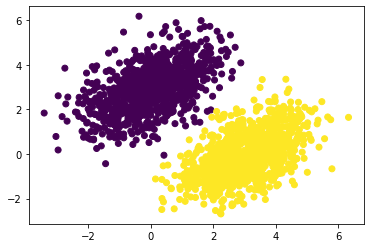

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()